***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第五章是对支持向量机SVM的系统介绍，阐述支持向量机的核心概念，怎么使用这个强大的模型，以及它是如何工作的。  
这应该是第三次做这方面的内容了，贴出另一个比较全面的SVM进阶博客。
https://blog.csdn.net/v_JULY_v/article/details/7624837
支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。**SVM特别适合应用于复杂但中小规模数据集的分类问题**。  
本章使用数据为Sklearn中iris数据
源代码已经同步在github中  
https://github.com/jwc19890114/-02-learning-file-100days
### 决策树
终于追上进度了，今天进入决策树（Decision Trees）的学习，会配合Day100里面响应那天的教程，先完成本章学习，再进入Day100教程。  
决策树是一种多功能机器学习算法，同样也可以执行分类任务、回归任务和多输出任务，在第三章中做了相对详细的介绍。决策树可以对很复杂的数据集进行拟合。  
决策树是随机森林的基本组成部分。  
本章学习内容
- 讨论如何使用决策树进行训练，可视化和预测。
- 学习在Sklearn上面使用 CART 算法，并且探讨如何调整决策树让它可以用于执行回归任务。
- 讨论一下决策树目前存在的一些局限性。
### 1. 决策树训练的可视化
使用数据集，sklearn的iris
~~~python
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# 保存文件的路径
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
~~~
#### 引入数据
注意这里对数据集的调用，与之前不同，sklearn能够直接调用iris数据集，然后使用类似调用方法的写法来获取数据
~~~python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data[:,2:]
y=iris.target
#训练一波，在这里我跑了两个模型作为对比，一个深度为2，一个深度为3。
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)
~~~
**你可以通过使用export_graphviz()方法，通过生成一个叫做iris_tree.dot的图形定义文件将一个训练好的决策树模型可视化。在这里要提前在文件根目录下建立一个新的文件夹images/decision_trees**
~~~python
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=image_path('iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
               )
~~~
#### 生成决策树图
现在生成的是一个.dot文件，教程中使用Graphviz软件将该文件转为了决策树图  
**安装方法**
1. 我把msi版本软件放在了github根目录下，也可以从以下地址下载https://graphviz.gitlab.io/_pages/Download/Download_windows.html
2. 按照教程安装https://www.cnblogs.com/shuodehaoa/p/8667045.html
3. 在测试成功安装后，进入decision_trees文件夹，按住shift同时右键，在该文件夹下进入powershell
4. 在命令行输入dot -Tpng iris_tree.dot -o iris_tree.png
5. 你会发现文件夹下有一个新的文件iris_tree.png，这就是生成的决策树图，根据上面的两个模型，在这里可以生成两张图，对比一哈……
图
#### 开始预测
刚才生成的是决策树图，现在基于图进行分析。  
- 从根节点（最顶端节点，深度为0）开始进行分类。该节点询问花朵的花瓣长度是否小于 2.45 厘米。如果是，向下移动到根的左侧子节点（深度为 1，左侧）。 在这种情况下，它是一片叶子节点（即它没有任何子节点），所以它不会问任何问题：查看该节点的预测类别，决策树预测你的花是 Iris-Setosa（class = setosa）。  
- 另一朵花，但这次的花瓣长度是大于 2.45 厘米的。向下移动到根的右侧子节点（深度为 1，右侧），而这个节点不是叶节点，所以它会问另一个问题：花瓣宽度是否小于 1.75 厘米？ 如果是，那么你的花很可能是一个 Iris-Versicolor（深度为 2，左）。 如果不是，那很可能一个 Iris-Virginica（深度为 2，右）。  
- 节点samples属性统计出应用于多少个样本实例。  
- 节点value属性统计每一个类别样例数目。
- 节点Gini属性测量纯度，（越小越好？），如果一个节点包含的所有训练样例全都是同一类别的，我们就说这个节点是纯的（Gini=0）。
计算公式  
$P_{i,k}$是第i个节点中训练实例为的k类实例的比值。  
Sklearn使用的是CART算法，该算法仅产生二叉树（只有是或否两个结果），ID3这类算法更吊，能产生超过两个子节点的决策树模型。  
进一步，生成决策树的决策边界。
~~~python
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
#2.45是用来区分setosa，小于2.45就在左侧setosa，大于2.45则进入下一个分类
#1.75是用来区分versicolor，小于的在下侧，就是versicolor，大于的在上侧，就是virginica

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()
~~~

In [10]:
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# 保存文件的路径
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [18]:
#引入数据，注意这里对数据集的调用，与之前不同，sklearn能够直接调用iris数据集，然后使用类似调用方法的写法来获取数据
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data[:,2:]
y=iris.target
#训练一波
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#你可以通过使用export_graphviz()方法，通过生成一个叫做iris_tree.dot的图形定义文件将一个训练好的决策树模型可视化。
#在这里要提前在文件根目录下建立一个新的文件夹images/decision_trees
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=image_path('iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
               )
#现在生成的是一个.dot文件，教程中使用Graphviz软件将该文件转为了决策树图
'''
安装方法
1. 我把msi版本软件放在了github根目录下，也可以从以下地址下载https://graphviz.gitlab.io/_pages/Download/Download_windows.html
2. 按照教程安装https://www.cnblogs.com/shuodehaoa/p/8667045.html
3. 在测试成功安装后，进入decision_trees文件夹，按住shift同时右键，在该文件夹下进入powershell
4. 在命令行输入dot -Tpng iris_tree.dot -o iris_tree.png
5. 你会发现文件夹下有一个新的文件iris_tree.png，这就是生成的决策树图
'''

'\n安装方法\n1. 我把msi版本软件放在了github根目录下，也可以从以下地址下载https://graphviz.gitlab.io/_pages/Download/Download_windows.html\n2. 按照教程安装https://www.cnblogs.com/shuodehaoa/p/8667045.html\n3. 在测试成功安装后，进入decision_trees文件夹，按住shift同时右键，在该文件夹下进入powershell\n4. 在命令行输入dot -Tpng iris_tree.dot -o iris_tree.png\n5. 你会发现文件夹下有一个新的文件iris_tree.png，这就是生成的决策树图\n'

#### 开始预测
刚才生成的是决策树图，现在基于图进行分析。  
- 从根节点（最顶端节点，深度为0）开始进行分类。该节点询问花朵的花瓣长度是否小于 2.45 厘米。如果是，向下移动到根的左侧子节点（深度为 1，左侧）。 在这种情况下，它是一片叶子节点（即它没有任何子节点），所以它不会问任何问题：查看该节点的预测类别，决策树预测你的花是 Iris-Setosa（class = setosa）。  
- 另一朵花，但这次的花瓣长度是大于 2.45 厘米的。向下移动到根的右侧子节点（深度为 1，右侧），而这个节点不是叶节点，所以它会问另一个问题：花瓣宽度是否小于 1.75 厘米？ 如果是，那么你的花很可能是一个 Iris-Versicolor（深度为 2，左）。 如果不是，那很可能一个 Iris-Virginica（深度为 2，右）。  
- 节点samples属性统计出应用于多少个样本实例。  
- 节点value属性统计每一个类别样例数目。
- 节点Gini属性测量纯度，（越小越好？），如果一个节点包含的所有训练样例全都是同一类别的，我们就说这个节点是纯的（Gini=0）。
计算公式  
$P_{i,k}$是第i个节点中训练实例为的k类实例的比值。  
Sklearn使用的是CART算法，该算法仅产生二叉树（只有是或否两个结果），ID3这类算法更吊，能产生超过两个子节点的决策树模型。  
进一步，生成决策树的决策边界。

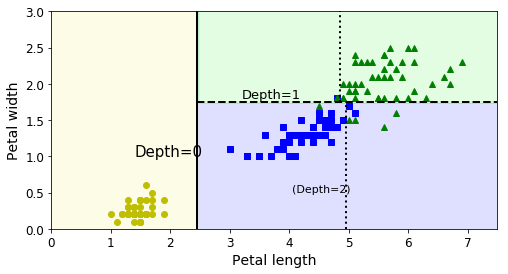

In [24]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
#2.45是用来区分setosa，小于2.45就在左侧setosa，大于2.45则进入下一个分类
#1.75是用来区分versicolor，小于的在下侧，就是versicolor，大于的在上侧，就是virginica

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第五章是对支持向量机SVM的系统介绍，阐述支持向量机的核心概念，怎么使用这个强大的模型，以及它是如何工作的。  
这应该是第三次做这方面的内容了，贴出另一个比较全面的SVM进阶博客。
https://blog.csdn.net/v_JULY_v/article/details/7624837
支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。**SVM特别适合应用于复杂但中小规模数据集的分类问题**。  
本章使用数据为Sklearn中iris数据
源代码已经同步在github中  
https://github.com/jwc19890114/-02-learning-file-100days
#### 估计分类概率
决策树还可以估计某个实例属于特定类k的概率：首先遍历树来查找此实例的叶节点，然后它返回此节点中类k的训练实例的比例。  
这里测试一个花瓣长5厘米，宽1.5厘米的花朵，决策树输出概率和所述类别。
~~~python
print(tree_clf.predict_proba([[5,1.5]])) #[[0.         0.90740741 0.09259259]]
print(tree_clf.predict([[5,1.5]])) #[1]
~~~
#### CART训练算法
Sklearn使用分类回归树（CART）训练决策树，首先使用单个特征k和阈值$t_k$将训练集分为两个子集，选择特征k的依据是特征k能够产生最纯粹的子集对（k,$t_k$），然后通过子集大小加权计算。  
算法公式  
当它成功的将训练集分成两部分之后，将会继续使用相同的递归式逻辑继续的分割子集，然后是子集的子集。当达到预定的最大深度之后将会停止分类（由max_depth超参数决定），或者是它找不到可以继续降低不纯度的分裂方法的时候。  
**几个超参数**
- min_samples_split
- min_samples_leaf
- min_weight_fraction_leaf
- max_leaf_nodes

找到最优树是一个**NP完全问题**（其实不懂，但是没关系，往下看就好了，这是一个装逼时间……）
NP就是Non-deterministic Polynomial的问题，也即是多项式复杂程度的非确定性问题。而如果任何一个NP问题都能通过一个多项式时间算法转换为某个NP问题，那么这个NP问题就称为NP完全问题（Non-deterministic Polynomial complete problem）。NP完全问题也叫做NPC问题。  
它需要 O(exp^m) 时间，即使对于相当小的训练集也会使问题变得棘手。 这就是为什么我们必须设置一个“合理的”（而不是最佳的）解决方案。  
#### 计算复杂度
在建立好决策树模型后，做出预测需要遍历决策树， 从根节点一直到叶节点。决策树通常近似左右平衡，因此遍历决策树需要经历大致$O(log_2m)$节点。  
由于每个节点只需要检查一个特征的值，因此总体预测复杂度仅为$O(log_2m)$，与特征的数量无关。所以即使在处理大型训练集时，预测速度也非常快。  
然而，训练算法的时候（训练和预测不同）需要比较所有特征,在每个节点的所有样本上。就有了$O(n×m log(m))$ 的训练复杂度。对于小型训练集（样本小于几千），Sklearn可以通过预先设置数据（presort = True）来加速训练，但是这对于较大训练集来说会显着减慢训练速度。
#### 基尼不纯度或是信息熵
在决策树中，使用Gini不纯度来监测，可以通过将标准超参数设置为entropy来使用熵不纯度进行检测。  基尼指数计算稍微快一点，是一个很好的默认值。但是，也有的时候它们会产生不同的树。  
- 基尼指数会趋于在树的分支中将最多的类隔离出来。
- 熵指数趋向于产生略微平衡一些的决策树模型。
#### 正则化超参数
在决策树生成的过程中，如果不添加约束（修剪决策树），模型会根据训练数据进行调整，这就导致模型能够很好地拟合训练数据，同时也就出现了过拟合现象。这种模型被称为非参数模型（在训练之初没有设定训练的参数量）。  
**决策树分类有一些参数来限制树模型形状（之前提到过）**  
- min_samples_split
节点在被分裂之前必须具有的最小样本数
- min_samples_leaf
叶节点必须具有的最小样本数
- min_weight_fraction_leaf
和min_samples_leaf相同，但表示为加权总数的一小部分实例
- max_leaf_nodes
叶节点的最大数量
- max_features
在每个节点被评估是否分裂的时候，具有的最大特征数量
- 增加min_* hyperparameters或者减少max_* hyperparameters会使模型正则化
这里教程里生成了两个决策树模型，一个没有限制生长条件，一个做了限制。
~~~python
from sklearn.datasets import make_moons
Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=53)
deep_tree_clf1=DecisionTreeClassifier(random_state=42)
deep_tree_clf2=DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1,Xm,ym,axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('None',fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2,Xm,ym,axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_sample_leaf',fontsize=16)
plt.show()
~~~

In [26]:
print(tree_clf.predict_proba([[5,1.5]]))
print(tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


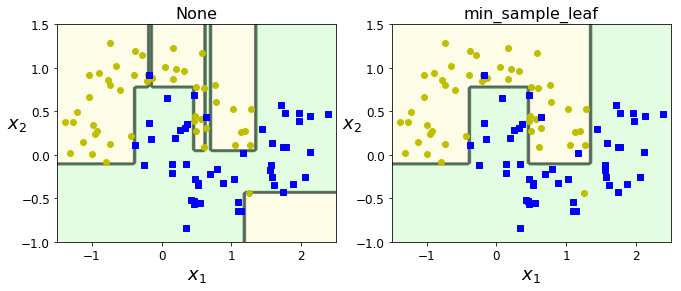

In [28]:
from sklearn.datasets import make_moons
Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=53)
deep_tree_clf1=DecisionTreeClassifier(random_state=42)
deep_tree_clf2=DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1,Xm,ym,axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('None',fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2,Xm,ym,axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_sample_leaf',fontsize=16)
plt.show()

***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第五章是对支持向量机SVM的系统介绍，阐述支持向量机的核心概念，怎么使用这个强大的模型，以及它是如何工作的。  
这应该是第三次做这方面的内容了，贴出另一个比较全面的SVM进阶博客。
https://blog.csdn.net/v_JULY_v/article/details/7624837
支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。**SVM特别适合应用于复杂但中小规模数据集的分类问题**。  
本章使用数据为Sklearn中iris数据
源代码已经同步在github中  
https://github.com/jwc19890114/-02-learning-file-100days
#### 回归
决策树也可以完成回归任务
##### 生成随机数
~~~python
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10
~~~
##### 构建两个决策树回归模型，不同的深度
~~~python
tree_reg1=DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg2=DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

#绘制回归预测
def plot_regression_predictions(tree_reg,X,y,axes=[0,1,-0.2,1],ylabel="$y$"):
    #在前面类似的绘图方法中都会出现np.linspace，其作用是在指定的间隔内返回均匀间隔的数字。
    #返回num均匀分布的样本，在[start, stop]。这个区间的端点可以任意的被排除在外。
    #在这里np.linspace(axes[0],axes[1],500)就是代表生成500个介于0-1之间的均匀间隔的数字，然后使用reshape函数重组
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=tree_reg.predict(x1)
    
    plt.axis(axes)
    plt.xlabel("$x$",fontsize=14)
    if ylabel:
        plt.ylabel(ylabel,fontsize=14,rotation=0)
    plt.plot(X,y,"g.")
    plt.plot(x1,y_pred,"r.-",linewidth=2,label=r"$\hat{y}$")

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1,X,y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split,split],[-0.2,1],style,linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
# plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
~~~
图中左侧显示的是max_depth=2模型的预测结果，如果你将max_depth=3设置为3，模型就会右侧显示的那样。注意每个区域的预测值总是该区域中实例的平均目标值。算法以一种使大多数训练实例尽可能接近该预测值的方式分割每个区域。**注意图中的红线**  
现在按照上节所说的方法生成随机树图  
~~~python
export_graphviz(
    tree_reg1,
    out_file=image_path("regression_tree1.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
export_graphviz(
    tree_reg2,
    out_file=image_path("regression_tree2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
#dot -Tpng regression_tree1.dot -o regression_tree1.png
#dot -Tpng regression_tree2.dot -o regression_tree2.png
~~~
图很骚啊，可以看看。图和之前分类树的类似，但是预测的每个节点样本已经从一个**类别**变成了一个**数值**，这也就是为什么之前图中预测的红线是直的，因为那是一个数值啊，用预测值的方式来进行分割。
#### 过拟合的决策树回归
一样，决策树在处理回归问题的时候如果不添加正则化，就会出现过拟合，设定超参数min_samples_leaf=5和10，会发现10的效果会好一些。
~~~python
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()
~~~
#### 决策树的缺陷-不稳定性
决策树很容易理解和解释，易于使用且功能丰富而强大。  
然而，它也有一些限制。
- 决策树很喜欢设定正交化的决策边界，（所有边界都是和某一个轴相垂直的），这使得它对训练数据集的旋转很敏感。
- 决策时的主要问题是它对训练数据的微小变化非常敏感

In [38]:
import numpy as np
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10

In [39]:
#构建一个决策树回归
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Text(0.5,1,'max_depth=3')

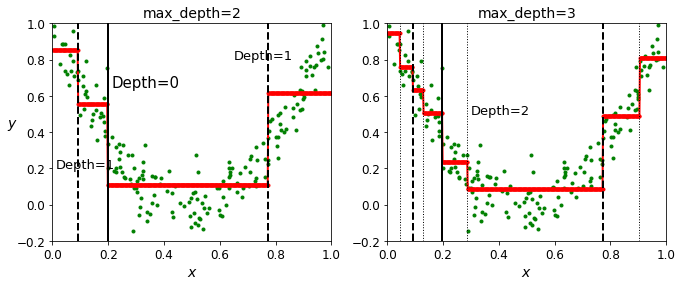

In [60]:
tree_reg1=DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg2=DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

#绘制回归预测
def plot_regression_predictions(tree_reg,X,y,axes=[0,1,-0.2,1],ylabel="$y$"):
    #在前面类似的绘图方法中都会出现np.linspace，其作用是在指定的间隔内返回均匀间隔的数字。
    #返回num均匀分布的样本，在[start, stop]。这个区间的端点可以任意的被排除在外。
    #在这里np.linspace(axes[0],axes[1],500)就是代表生成500个介于0-1之间的均匀间隔的数字，然后使用reshape函数重组
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=tree_reg.predict(x1)
    
    plt.axis(axes)
    plt.xlabel("$x$",fontsize=14)
    if ylabel:
        plt.ylabel(ylabel,fontsize=14,rotation=0)
    plt.plot(X,y,"g.")
    plt.plot(x1,y_pred,"r.-",linewidth=2,label=r"$\hat{y}$")

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1,X,y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split,split],[-0.2,1],style,linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
# plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

In [62]:
export_graphviz(
    tree_reg1,
    out_file=image_path("regression_tree1.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
export_graphviz(
    tree_reg2,
    out_file=image_path("regression_tree2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
#dot -Tpng regression_tree1.dot -o regression_tree1.png
#dot -Tpng regression_tree2.dot -o regression_tree2.png

Saving figure tree_regression_regularization_plot


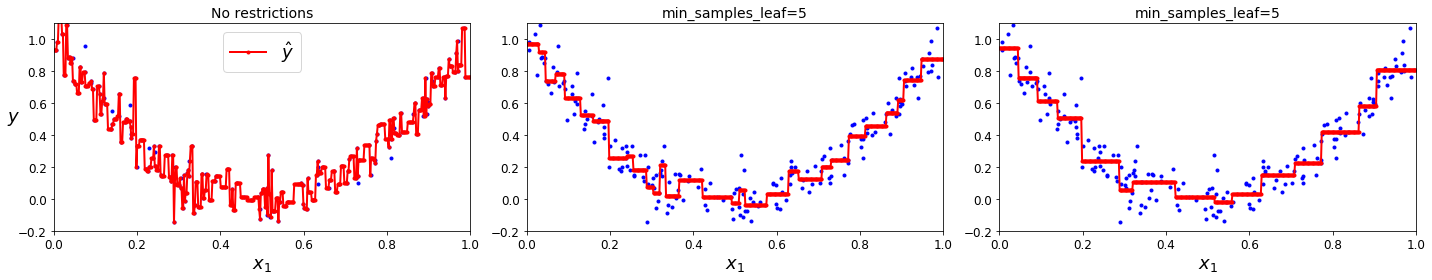

In [68]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
tree_reg3 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
tree_reg3.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
y_pred3 = tree_reg3.predict(x1)

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(132)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.subplot(133)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred3, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()